In [1]:
from google.colab import files
import io
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['savefig.dpi'] = 600
import seaborn as sns
from matplotlib import cm
import scipy.stats as stats
from matplotlib.lines import Line2D
from matplotlib import ticker
import matplotlib.gridspec as gridspec

In [2]:
# Mounting my google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1) (re)computing the empirical divergence correlations

Let's first (re)compute all the empirical divergence correlations:

In [3]:
# Function to compute the confidence interval on spearman rho
def spearman_ci(x, y, ci=95, n_boots=10000, seed=22):
  x = np.asarray(x)
  y = np.asarray(y)

  # (n_boots, n_observations) paired arrays
  rng = np.random.default_rng(seed) # For reproducible bootstrapping
  rand_ixs = rng.integers(0, x.shape[0], size=(n_boots, x.shape[0]))
  x_boots = x[rand_ixs]
  y_boots = y[rand_ixs]

  # Spearman correlations
  corrs = []

  for row in range(x_boots.shape[0]):
    rho = stats.spearmanr(x_boots[row, :], y_boots[row, :])
    corrs.append(rho[0])

  # Quantiles of correlations coefficients and confidence interval
  corrs = np.asarray(corrs)

  ci_low = np.percentile(corrs, (100 - ci) / 2)
  ci_high = np.percentile(corrs, (ci + 100) / 2)

  return ci_low, ci_high, corrs

In [4]:
# Empirical divergence data is imported
couples_divergence = pd.read_csv('/content/drive/My Drive/Redaction_SA/'
                                 'Final_figures/Data_sim_ready/'
                                 'couples_divergence.csv')

# Only WGD-derived pairs are kept
couples_divergence = couples_divergence[couples_divergence['Duplication'] == 'WGD'].reset_index(drop=True)

In [5]:
# Confidence interval on the empirical correlation of divergence
rho_emp = spearman_ci(couples_divergence['bm_fold_original'],
                      couples_divergence['bp_fold_original'])
spearman_ci_div = (rho_emp[0], rho_emp[1])
dist_boot_div = rho_emp[2]

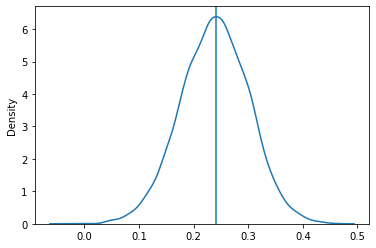

In [6]:
# Quick validation that bootstrapping is valid:
center_div = stats.spearmanr(couples_divergence['bm_fold_original'],
                         couples_divergence['bp_fold_original'])[0]

sns.kdeplot(dist_boot_div)
plt.axvline(x=center_div)

The 95% confidence interval is also computed for the signed divergence correlation:

In this case, a duplicated dataset is used, so that logfold changes are computed in the two possible orientations for each paralog pair

In [7]:
couples_divergence['bm_fold_signed_1'] = np.log2((10**couples_divergence['bm_P1']) / (10**couples_divergence['bm_P2']))
couples_divergence['bp_fold_signed_1'] = np.log2((10**couples_divergence['bp_P1']) / (10**couples_divergence['bp_P2']))
couples_divergence['bm_fold_signed_2'] = np.log2((10**couples_divergence['bm_P2']) / (10**couples_divergence['bm_P1']))
couples_divergence['bp_fold_signed_2'] = np.log2((10**couples_divergence['bp_P2']) / (10**couples_divergence['bp_P1']))

In [8]:
logfold_dupli_1 = couples_divergence[['Duplication', 'ORF_P1', 'ORF_P2',
                                    'bm_fold_signed_1', 'bp_fold_signed_1']].copy()

logfold_dupli_1.columns = ['Duplication', 'ORF_P1', 'ORF_P2',
                          'bm_fold_signed', 'bp_fold_signed']


logfold_dupli_2 = couples_divergence[['Duplication', 'ORF_P1', 'ORF_P2',
                                    'bm_fold_signed_2', 'bp_fold_signed_2']].copy()

logfold_dupli_2.columns = ['Duplication', 'ORF_P1', 'ORF_P2',
                          'bm_fold_signed', 'bp_fold_signed']

logfold_dupli = pd.concat([logfold_dupli_1, logfold_dupli_2])

In [9]:
# Confidence interval on the empirical correlation of divergence
rho_emp = spearman_ci(logfold_dupli['bm_fold_signed'],
                      logfold_dupli['bp_fold_signed'])
spearman_ci_sign = (rho_emp[0], rho_emp[1])
dist_boot_sign = rho_emp[2]

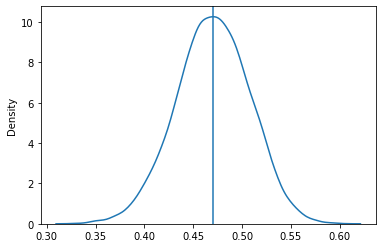

In [10]:
# Quick validation that bootstrapping is valid:
center_sign = stats.spearmanr(logfold_dupli['bm_fold_signed'],
                              logfold_dupli['bp_fold_signed'])[0]

sns.kdeplot(dist_boot_sign)
plt.axvline(x=center_sign)

## 2) Importing and formatting simulation data

In [11]:
corrs_1e6_alpha = pd.read_csv('/content/drive/My Drive/Redaction_SA/Final_figures_v2/'
                              'Summ_stats_constraints_simulations/Correlations_all_Mut_alpha_WGD.csv')
dist_1e6_alpha = pd.read_csv('/content/drive/My Drive/Redaction_SA/Final_figures_v2/'
                             'Summ_stats_constraints_simulations/Dist_stats_all_Mut_alpha_WGD.csv')
corrs_1e5_alpha = pd.read_csv('/content/drive/My Drive/Redaction_SA/Final_figures_v2/'
                              'Summ_stats_constraints_simulations/Correlations_all_Mut_alpha_WGD_1e5.csv')
dist_1e5_alpha = pd.read_csv('/content/drive/My Drive/Redaction_SA/Final_figures_v2/'
                             'Summ_stats_constraints_simulations/Dist_stats_all_Mut_alpha_WGD_1e5.csv')

corrs_1e6_corr = pd.read_csv('/content/drive/My Drive/Redaction_SA/Final_figures_v2/'
                             'Summ_stats_constraints_simulations/Correlations_all_Mut_correlations_WGD.csv')
dist_1e6_corr = pd.read_csv('/content/drive/My Drive/Redaction_SA/Final_figures_v2/'
                            'Summ_stats_constraints_simulations/Dist_stats_all_Mut_correlations_WGD.csv')
corrs_1e5_corr = pd.read_csv('/content/drive/My Drive/Redaction_SA/Final_figures_v2/'
                             'Summ_stats_constraints_simulations/Correlations_all_Mut_correlations_WGD_1e5.csv')
dist_1e5_corr = pd.read_csv('/content/drive/My Drive/Redaction_SA/Final_figures_v2/'
                            'Summ_stats_constraints_simulations/Dist_stats_all_Mut_correlations_WGD_1e5.csv')

p-values of Mood's median test as well as the two correlation coefficients first need to be processed to construct matrices that will be used to annotate the heatmaps, to indicate whether the four corresponding conditions were met for each combination of parameters (cell).

To this end, separate dataframes are made for each iteration of the simulations:

In [12]:
run_ratio = {'0.5': '1/2', '1.0': '1', '2.0': '2', '3.0': '3', '4.0': '4', 
             '5.0': '5', '6.0': '6', '7.0': '7', '8.0': '8', '9.0': '9', 
             '10.0': '10'}

In [13]:
corrs_1e6_alpha = corrs_1e6_alpha.astype({'Mut_ratio': 'string'})
dist_1e6_alpha = dist_1e6_alpha.astype({'Mut_ratio': 'string'})
corrs_1e5_alpha = corrs_1e5_alpha.astype({'Mut_ratio': 'string'})
dist_1e5_alpha = dist_1e5_alpha.astype({'Mut_ratio': 'string'})
corrs_1e6_corr = corrs_1e6_corr.astype({'Mut_ratio': 'string'})
dist_1e6_corr = dist_1e6_corr.astype({'Mut_ratio': 'string'})
corrs_1e5_corr = corrs_1e5_corr.astype({'Mut_ratio': 'string'})
dist_1e5_corr = dist_1e5_corr.astype({'Mut_ratio': 'string'})

for df in [corrs_1e6_alpha, dist_1e6_alpha, corrs_1e5_alpha, dist_1e5_alpha, corrs_1e6_corr, dist_1e6_corr, corrs_1e5_corr, dist_1e5_corr]:

  for row in range(df.shape[0]):
    df.at[row, 'Iter'] = df.at[row, 'Iter'][-5:]
    df.at[row, 'Mut_ratio'] = run_ratio[df.at[row, 'Mut_ratio']]

corrs_1e6_alpha = corrs_1e6_alpha[corrs_1e6_alpha['Model'] == 'Minimal'].reset_index(drop=True)
dist_1e6_alpha = dist_1e6_alpha[dist_1e6_alpha['Model'] == 'Minimal'].reset_index(drop=True)
corrs_1e5_alpha = corrs_1e5_alpha[corrs_1e5_alpha['Model'] == 'Minimal'].reset_index(drop=True)
dist_1e5_alpha = dist_1e5_alpha[dist_1e5_alpha['Model'] == 'Minimal'].reset_index(drop=True)
corrs_1e6_corr = corrs_1e6_corr[corrs_1e6_corr['Model'] == 'Minimal'].reset_index(drop=True)
dist_1e6_corr = dist_1e6_corr[dist_1e6_corr['Model'] == 'Minimal'].reset_index(drop=True)
corrs_1e5_corr = corrs_1e5_corr[corrs_1e5_corr['Model'] == 'Minimal'].reset_index(drop=True)
dist_1e5_corr = dist_1e5_corr[dist_1e5_corr['Model'] == 'Minimal'].reset_index(drop=True)

In [14]:
# For the correlations
corrs_1e6_alpha_1 = corrs_1e6_alpha[corrs_1e6_alpha['Iter'] == 'iter1'].reset_index(drop=True)
corrs_1e6_alpha_2 = corrs_1e6_alpha[corrs_1e6_alpha['Iter'] == 'iter2'].reset_index(drop=True)
corrs_1e6_alpha_3 = corrs_1e6_alpha[corrs_1e6_alpha['Iter'] == 'iter3'].reset_index(drop=True)

corrs_1e5_alpha_1 = corrs_1e5_alpha[corrs_1e5_alpha['Iter'] == 'iter1'].reset_index(drop=True)
corrs_1e5_alpha_2 = corrs_1e5_alpha[corrs_1e5_alpha['Iter'] == 'iter2'].reset_index(drop=True)
corrs_1e5_alpha_3 = corrs_1e5_alpha[corrs_1e5_alpha['Iter'] == 'iter3'].reset_index(drop=True)

corrs_1e6_corr_1 = corrs_1e6_corr[corrs_1e6_corr['Iter'] == 'iter1'].reset_index(drop=True)
corrs_1e6_corr_2 = corrs_1e6_corr[corrs_1e6_corr['Iter'] == 'iter2'].reset_index(drop=True)
corrs_1e6_corr_3 = corrs_1e6_corr[corrs_1e6_corr['Iter'] == 'iter3'].reset_index(drop=True)

corrs_1e5_corr_1 = corrs_1e5_corr[corrs_1e5_corr['Iter'] == 'iter1'].reset_index(drop=True)
corrs_1e5_corr_2 = corrs_1e5_corr[corrs_1e5_corr['Iter'] == 'iter2'].reset_index(drop=True)
corrs_1e5_corr_3 = corrs_1e5_corr[corrs_1e5_corr['Iter'] == 'iter3'].reset_index(drop=True)

In [15]:
# For the results of Moods median test
dist_1e6_alpha_1 = dist_1e6_alpha[dist_1e6_alpha['Iter'] == 'iter1'].reset_index(drop=True)
dist_1e6_alpha_2 = dist_1e6_alpha[dist_1e6_alpha['Iter'] == 'iter2'].reset_index(drop=True)
dist_1e6_alpha_3 = dist_1e6_alpha[dist_1e6_alpha['Iter'] == 'iter3'].reset_index(drop=True)

dist_1e5_alpha_1 = dist_1e5_alpha[dist_1e5_alpha['Iter'] == 'iter1'].reset_index(drop=True)
dist_1e5_alpha_2 = dist_1e5_alpha[dist_1e5_alpha['Iter'] == 'iter2'].reset_index(drop=True)
dist_1e5_alpha_3 = dist_1e5_alpha[dist_1e5_alpha['Iter'] == 'iter3'].reset_index(drop=True)

dist_1e6_corr_1 = dist_1e6_corr[dist_1e6_corr['Iter'] == 'iter1'].reset_index(drop=True)
dist_1e6_corr_2 = dist_1e6_corr[dist_1e6_corr['Iter'] == 'iter2'].reset_index(drop=True)
dist_1e6_corr_3 = dist_1e6_corr[dist_1e6_corr['Iter'] == 'iter3'].reset_index(drop=True)

dist_1e5_corr_1 = dist_1e5_corr[dist_1e5_corr['Iter'] == 'iter1'].reset_index(drop=True)
dist_1e5_corr_2 = dist_1e5_corr[dist_1e5_corr['Iter'] == 'iter2'].reset_index(drop=True)
dist_1e5_corr_3 = dist_1e5_corr[dist_1e5_corr['Iter'] == 'iter3'].reset_index(drop=True)

Then, these dataframes are used to create matrices (one per iteration) for each summary statistic. From this point, we only focus on the data obtained from simulation with N = 10^5.

In [16]:
# Correlations between log-fold relative divergences
fold_alpha_1 = corrs_1e5_alpha_1[corrs_1e5_alpha_1['Type'] == 'All'].pivot(index='Mut_alpha',
                                                                           columns='Mut_ratio', values='rho_fold')
fold_alpha_2 = corrs_1e5_alpha_2[corrs_1e5_alpha_2['Type'] == 'All'].pivot(index='Mut_alpha',
                                                                           columns='Mut_ratio', values='rho_fold')
fold_alpha_3 = corrs_1e5_alpha_3[corrs_1e5_alpha_3['Type'] == 'All'].pivot(index='Mut_alpha',
                                                                           columns='Mut_ratio', values='rho_fold')

fold_corr_1 = corrs_1e5_corr_1[corrs_1e5_corr_1['Type'] == 'All'].pivot(index='Mut_corr',
                                                                           columns='Mut_ratio', values='rho_fold')
fold_corr_2 = corrs_1e5_corr_2[corrs_1e5_corr_2['Type'] == 'All'].pivot(index='Mut_corr',
                                                                           columns='Mut_ratio', values='rho_fold')
fold_corr_3 = corrs_1e5_corr_3[corrs_1e5_corr_3['Type'] == 'All'].pivot(index='Mut_corr',
                                                                           columns='Mut_ratio', values='rho_fold')

# Correlations between signed relative divergences
signed_alpha_1 = corrs_1e5_alpha_1[corrs_1e5_alpha_1['Type'] == 'All'].pivot(index='Mut_alpha',
                                                                             columns='Mut_ratio', values='rho_signed')
signed_alpha_2 = corrs_1e5_alpha_2[corrs_1e5_alpha_2['Type'] == 'All'].pivot(index='Mut_alpha',
                                                                             columns='Mut_ratio', values='rho_signed')
signed_alpha_3 = corrs_1e5_alpha_3[corrs_1e5_alpha_3['Type'] == 'All'].pivot(index='Mut_alpha',
                                                                             columns='Mut_ratio', values='rho_signed')

signed_corr_1 = corrs_1e5_corr_1[corrs_1e5_corr_1['Type'] == 'All'].pivot(index='Mut_corr',
                                                                          columns='Mut_ratio', values='rho_signed')
signed_corr_2 = corrs_1e5_corr_2[corrs_1e5_corr_2['Type'] == 'All'].pivot(index='Mut_corr',
                                                                          columns='Mut_ratio', values='rho_signed')
signed_corr_3 = corrs_1e5_corr_3[corrs_1e5_corr_3['Type'] == 'All'].pivot(index='Mut_corr',
                                                                          columns='Mut_ratio', values='rho_signed')

In [17]:
# Mood's median test p-values, for iteration 1
Moods_alpha_bm_1 = dist_1e5_alpha_1[(dist_1e5_alpha_1['Property'] == 'Transcription rate') & 
                                    (dist_1e5_alpha_1['Comparison'] == 'WGD') & 
                                    (dist_1e5_alpha_1['Type'] == 'All')].pivot(index='Mut_alpha',
                                     columns='Mut_ratio', values='Moods_p-val')
                                    
Moods_alpha_bp_1 = dist_1e5_alpha_1[(dist_1e5_alpha_1['Property'] == 'Translation rate') & 
                                    (dist_1e5_alpha_1['Comparison'] == 'WGD') & 
                                    (dist_1e5_alpha_1['Type'] == 'All')].pivot(index='Mut_alpha',
                                     columns='Mut_ratio', values='Moods_p-val')
                                    
Moods_alpha_p_1 = dist_1e5_alpha_1[(dist_1e5_alpha_1['Property'] == 'Protein abundance') & 
                                   (dist_1e5_alpha_1['Comparison'] == 'WGD') & 
                                   (dist_1e5_alpha_1['Type'] == 'All')].pivot(index='Mut_alpha',
                                    columns='Mut_ratio', values='Moods_p-val')
                                     
Moods_corr_bm_1 = dist_1e5_corr_1[(dist_1e5_corr_1['Property'] == 'Transcription rate') & 
                                  (dist_1e5_corr_1['Comparison'] == 'WGD') & 
                                  (dist_1e5_corr_1['Type'] == 'All')].pivot(index='Mut_corr',
                                   columns='Mut_ratio', values='Moods_p-val')
                                    
Moods_corr_bp_1 = dist_1e5_corr_1[(dist_1e5_corr_1['Property'] == 'Translation rate') & 
                                  (dist_1e5_corr_1['Comparison'] == 'WGD') & 
                                  (dist_1e5_corr_1['Type'] == 'All')].pivot(index='Mut_corr',
                                   columns='Mut_ratio', values='Moods_p-val')
                                    
Moods_corr_p_1 = dist_1e5_corr_1[(dist_1e5_corr_1['Property'] == 'Protein abundance') & 
                                 (dist_1e5_corr_1['Comparison'] == 'WGD') & 
                                 (dist_1e5_corr_1['Type'] == 'All')].pivot(index='Mut_corr',
                                  columns='Mut_ratio', values='Moods_p-val')
                                   
# Mood's median test p-values, for iteration 2
Moods_alpha_bm_2 = dist_1e5_alpha_2[(dist_1e5_alpha_2['Property'] == 'Transcription rate') & 
                                    (dist_1e5_alpha_2['Comparison'] == 'WGD') & 
                                    (dist_1e5_alpha_2['Type'] == 'All')].pivot(index='Mut_alpha',
                                     columns='Mut_ratio', values='Moods_p-val')
                                    
Moods_alpha_bp_2 = dist_1e5_alpha_2[(dist_1e5_alpha_2['Property'] == 'Translation rate') & 
                                    (dist_1e5_alpha_2['Comparison'] == 'WGD') & 
                                    (dist_1e5_alpha_2['Type'] == 'All')].pivot(index='Mut_alpha',
                                     columns='Mut_ratio', values='Moods_p-val')
                                    
Moods_alpha_p_2 = dist_1e5_alpha_2[(dist_1e5_alpha_2['Property'] == 'Protein abundance') & 
                                   (dist_1e5_alpha_2['Comparison'] == 'WGD') & 
                                   (dist_1e5_alpha_2['Type'] == 'All')].pivot(index='Mut_alpha',
                                    columns='Mut_ratio', values='Moods_p-val')
                                     
Moods_corr_bm_2 = dist_1e5_corr_2[(dist_1e5_corr_2['Property'] == 'Transcription rate') & 
                                  (dist_1e5_corr_2['Comparison'] == 'WGD') & 
                                  (dist_1e5_corr_2['Type'] == 'All')].pivot(index='Mut_corr',
                                   columns='Mut_ratio', values='Moods_p-val')
                                    
Moods_corr_bp_2 = dist_1e5_corr_2[(dist_1e5_corr_2['Property'] == 'Translation rate') & 
                                  (dist_1e5_corr_2['Comparison'] == 'WGD') & 
                                  (dist_1e5_corr_2['Type'] == 'All')].pivot(index='Mut_corr',
                                   columns='Mut_ratio', values='Moods_p-val')
                                    
Moods_corr_p_2 = dist_1e5_corr_2[(dist_1e5_corr_2['Property'] == 'Protein abundance') & 
                                 (dist_1e5_corr_2['Comparison'] == 'WGD') & 
                                 (dist_1e5_corr_2['Type'] == 'All')].pivot(index='Mut_corr',
                                  columns='Mut_ratio', values='Moods_p-val')
                                   
# Mood's median test p-values, for iteration 3
Moods_alpha_bm_3 = dist_1e5_alpha_3[(dist_1e5_alpha_3['Property'] == 'Transcription rate') & 
                                    (dist_1e5_alpha_3['Comparison'] == 'WGD') & 
                                    (dist_1e5_alpha_3['Type'] == 'All')].pivot(index='Mut_alpha',
                                     columns='Mut_ratio', values='Moods_p-val')
                                    
Moods_alpha_bp_3 = dist_1e5_alpha_3[(dist_1e5_alpha_3['Property'] == 'Translation rate') & 
                                    (dist_1e5_alpha_3['Comparison'] == 'WGD') & 
                                    (dist_1e5_alpha_3['Type'] == 'All')].pivot(index='Mut_alpha',
                                     columns='Mut_ratio', values='Moods_p-val')
                                    
Moods_alpha_p_3 = dist_1e5_alpha_3[(dist_1e5_alpha_3['Property'] == 'Protein abundance') & 
                                   (dist_1e5_alpha_3['Comparison'] == 'WGD') & 
                                   (dist_1e5_alpha_3['Type'] == 'All')].pivot(index='Mut_alpha',
                                    columns='Mut_ratio', values='Moods_p-val')
                                     
Moods_corr_bm_3 = dist_1e5_corr_3[(dist_1e5_corr_3['Property'] == 'Transcription rate') & 
                                  (dist_1e5_corr_3['Comparison'] == 'WGD') & 
                                  (dist_1e5_corr_3['Type'] == 'All')].pivot(index='Mut_corr',
                                   columns='Mut_ratio', values='Moods_p-val')
                                    
Moods_corr_bp_3 = dist_1e5_corr_3[(dist_1e5_corr_3['Property'] == 'Translation rate') & 
                                  (dist_1e5_corr_3['Comparison'] == 'WGD') & 
                                  (dist_1e5_corr_3['Type'] == 'All')].pivot(index='Mut_corr',
                                   columns='Mut_ratio', values='Moods_p-val')
                                    
Moods_corr_p_3 = dist_1e5_corr_3[(dist_1e5_corr_3['Property'] == 'Protein abundance') & 
                                 (dist_1e5_corr_3['Comparison'] == 'WGD') & 
                                 (dist_1e5_corr_3['Type'] == 'All')].pivot(index='Mut_corr',
                                  columns='Mut_ratio', values='Moods_p-val')

All these matrices are reindexed and reordered, before being used to generate the annotation matrices for the heatmap

In [18]:
# These matrices are reindexed and reordered
dfs = [fold_alpha_1, fold_alpha_2, fold_alpha_3, fold_corr_1, fold_corr_2,
       fold_corr_3, signed_alpha_1, signed_alpha_2, signed_alpha_3,
       signed_corr_1, signed_corr_2, signed_corr_3, Moods_alpha_bm_1,
       Moods_alpha_bp_1, Moods_alpha_p_1, Moods_corr_bm_1, Moods_corr_bp_1,
       Moods_corr_p_1, Moods_alpha_bm_2, Moods_alpha_bp_2, Moods_alpha_p_2,
       Moods_corr_bm_2, Moods_corr_bp_2, Moods_corr_p_2, Moods_alpha_bm_3,
       Moods_alpha_bp_3, Moods_alpha_p_3, Moods_corr_bm_3, Moods_corr_bp_3,
       Moods_corr_p_3]

for df in dfs:
    df.columns = ['1/2', '1', '10', '2', '3', '4', '5', '6', '7', '8', '9']

# For reordering the matrices
columns = ['1/2', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

# Reordering each
fold_alpha_1 = fold_alpha_1.reindex(labels=columns, axis='columns')
fold_alpha_2 = fold_alpha_2.reindex(labels=columns, axis='columns')
fold_alpha_3 = fold_alpha_3.reindex(labels=columns, axis='columns') 
fold_corr_1 = fold_corr_1.reindex(labels=columns, axis='columns') 
fold_corr_2 = fold_corr_2.reindex(labels=columns, axis='columns')
fold_corr_3 = fold_corr_3.reindex(labels=columns, axis='columns')
signed_alpha_1 = signed_alpha_1.reindex(labels=columns, axis='columns')
signed_alpha_2 = signed_alpha_2.reindex(labels=columns, axis='columns')
signed_alpha_3 = signed_alpha_3.reindex(labels=columns, axis='columns')
signed_corr_1 = signed_corr_1.reindex(labels=columns, axis='columns')
signed_corr_2 = signed_corr_2.reindex(labels=columns, axis='columns')
signed_corr_3 = signed_corr_3.reindex(labels=columns, axis='columns')
Moods_alpha_bm_1 = Moods_alpha_bm_1.reindex(labels=columns, axis='columns')
Moods_alpha_bp_1 = Moods_alpha_bp_1.reindex(labels=columns, axis='columns')
Moods_alpha_p_1 = Moods_alpha_p_1.reindex(labels=columns, axis='columns')
Moods_corr_bm_1 = Moods_corr_bm_1.reindex(labels=columns, axis='columns')
Moods_corr_bp_1 = Moods_corr_bp_1.reindex(labels=columns, axis='columns')
Moods_corr_p_1 = Moods_corr_p_1.reindex(labels=columns, axis='columns')
Moods_alpha_bm_2 = Moods_alpha_bm_2.reindex(labels=columns, axis='columns')
Moods_alpha_bp_2 = Moods_alpha_bp_2.reindex(labels=columns, axis='columns')
Moods_alpha_p_2 = Moods_alpha_p_2.reindex(labels=columns, axis='columns')
Moods_corr_bm_2 = Moods_corr_bm_2.reindex(labels=columns, axis='columns')
Moods_corr_bp_2 = Moods_corr_bp_2.reindex(labels=columns, axis='columns')
Moods_corr_p_2 = Moods_corr_p_2.reindex(labels=columns, axis='columns')
Moods_alpha_bm_3 = Moods_alpha_bm_3.reindex(labels=columns, axis='columns')
Moods_alpha_bp_3 = Moods_alpha_bp_3.reindex(labels=columns, axis='columns')
Moods_alpha_p_3 = Moods_alpha_p_3.reindex(labels=columns, axis='columns')
Moods_corr_bm_3 = Moods_corr_bm_3.reindex(labels=columns, axis='columns')
Moods_corr_bp_3 = Moods_corr_bp_3.reindex(labels=columns, axis='columns')
Moods_corr_p_3 = Moods_corr_p_3.reindex(labels=columns, axis='columns')

The annotation matrices can finally be generated.

First, if the 3 Mood's p-values are >0.05 for at least one replicate:

In [19]:
# For the simulations with asymmetrical mutational effects distributions
Moods_alpha_bm_1 = np.where(Moods_alpha_bm_1 > 0.05, 1, 0)
Moods_alpha_bp_1 = np.where(Moods_alpha_bp_1 > 0.05, 1, 0)
Moods_alpha_p_1 = np.where(Moods_alpha_p_1 > 0.05, 1, 0)

Moods_alpha_1 = Moods_alpha_bm_1 + Moods_alpha_bp_1 + Moods_alpha_p_1
Moods_alpha_1 = np.where(Moods_alpha_1 == 3, 1, 0)

Moods_alpha_bm_2 = np.where(Moods_alpha_bm_2 > 0.05, 1, 0)
Moods_alpha_bp_2 = np.where(Moods_alpha_bp_2 > 0.05, 1, 0)
Moods_alpha_p_2 = np.where(Moods_alpha_p_2 > 0.05, 1, 0)

Moods_alpha_2 = Moods_alpha_bm_2 + Moods_alpha_bp_2 + Moods_alpha_p_2
Moods_alpha_2 = np.where(Moods_alpha_2 == 3, 1, 0)

Moods_alpha_bm_3 = np.where(Moods_alpha_bm_3 > 0.05, 1, 0)
Moods_alpha_bp_3 = np.where(Moods_alpha_bp_3 > 0.05, 1, 0)
Moods_alpha_p_3 = np.where(Moods_alpha_p_3 > 0.05, 1, 0)
Moods_alpha_3 = Moods_alpha_bm_3 + Moods_alpha_bp_3 + Moods_alpha_p_3
Moods_alpha_3 = np.where(Moods_alpha_3 == 3, 1, 0)

Moods_any_alpha = Moods_alpha_1 + Moods_alpha_2 + Moods_alpha_3
Moods_any_alpha = np.where(Moods_any_alpha > 0, 1, 0)

# For the simulations with correlated bivariate mutational effects
Moods_corr_bm_1 = np.where(Moods_corr_bm_1 > 0.05, 1, 0)
Moods_corr_bp_1 = np.where(Moods_corr_bp_1 > 0.05, 1, 0)
Moods_corr_p_1 = np.where(Moods_corr_p_1 > 0.05, 1, 0)

Moods_corr_1 = Moods_corr_bm_1 + Moods_corr_bp_1 + Moods_corr_p_1
Moods_corr_1 = np.where(Moods_corr_1 == 3, 1, 0)

Moods_corr_bm_2 = np.where(Moods_corr_bm_2 > 0.05, 1, 0)
Moods_corr_bp_2 = np.where(Moods_corr_bp_2 > 0.05, 1, 0)
Moods_corr_p_2 = np.where(Moods_corr_p_2 > 0.05, 1, 0)

Moods_corr_2 = Moods_corr_bm_2 + Moods_corr_bp_2 + Moods_corr_p_2
Moods_corr_2 = np.where(Moods_corr_2 == 3, 1, 0)

Moods_corr_bm_3 = np.where(Moods_corr_bm_3 > 0.05, 1, 0)
Moods_corr_bp_3 = np.where(Moods_corr_bp_3 > 0.05, 1, 0)
Moods_corr_p_3 = np.where(Moods_corr_p_3 > 0.05, 1, 0)

Moods_corr_3 = Moods_corr_bm_3 + Moods_corr_bp_3 + Moods_corr_p_3
Moods_corr_3 = np.where(Moods_corr_3 == 3, 1, 0)

Moods_any_corr = Moods_corr_1 + Moods_corr_2 + Moods_corr_3
Moods_any_corr = np.where(Moods_any_corr > 0, 1, 0)

Second, if the simulated correlations fall within the corresponding empirical CI for at least one replicate (done separately for each type of correlation):

In [20]:
# Divergence correlation
fold_alpha_1 = np.where((fold_alpha_1 >= spearman_ci_div[0]) & (fold_alpha_1 <= spearman_ci_div[1]), 1, 0)
fold_alpha_2 = np.where((fold_alpha_2 >= spearman_ci_div[0]) & (fold_alpha_2 <= spearman_ci_div[1]), 1, 0)
fold_alpha_3 = np.where((fold_alpha_3 >= spearman_ci_div[0]) & (fold_alpha_3 <= spearman_ci_div[1]), 1, 0)

fold_equal_alpha = fold_alpha_1 + fold_alpha_2 + fold_alpha_3
fold_equal_alpha = np.where(fold_equal_alpha > 0, 1, 0)

fold_corr_1 = np.where((fold_corr_1 >= spearman_ci_div[0]) & (fold_corr_1 <= spearman_ci_div[1]), 1, 0)
fold_corr_2 = np.where((fold_corr_2 >= spearman_ci_div[0]) & (fold_corr_2 <= spearman_ci_div[1]), 1, 0)
fold_corr_3 = np.where((fold_corr_3 >= spearman_ci_div[0]) & (fold_corr_3 <= spearman_ci_div[1]), 1, 0)

fold_equal_corr = fold_corr_1 + fold_corr_2 + fold_corr_3
fold_equal_corr = np.where(fold_equal_corr > 0, 1, 0)

# Signed divergence correlation
signed_alpha_1 = np.where((signed_alpha_1 >= spearman_ci_sign[0]) & (signed_alpha_1 <= spearman_ci_sign[1]), 1, 0)
signed_alpha_2 = np.where((signed_alpha_2 >= spearman_ci_sign[0]) & (signed_alpha_2 <= spearman_ci_sign[1]), 1, 0)
signed_alpha_3 = np.where((signed_alpha_3 >= spearman_ci_sign[0]) & (signed_alpha_3 <= spearman_ci_sign[1]), 1, 0)

signed_equal_alpha = signed_alpha_1 + signed_alpha_2 + signed_alpha_3
signed_equal_alpha = np.where(signed_equal_alpha > 0, 1, 0)

signed_corr_1 = np.where((signed_corr_1 >= spearman_ci_sign[0]) & (signed_corr_1 <= spearman_ci_sign[1]), 1, 0)
signed_corr_2 = np.where((signed_corr_2 >= spearman_ci_sign[0]) & (signed_corr_2 <= spearman_ci_sign[1]), 1, 0)
signed_corr_3 = np.where((signed_corr_3 >= spearman_ci_sign[0]) & (signed_corr_3 <= spearman_ci_sign[1]), 1, 0)

signed_equal_corr = signed_corr_1 + signed_corr_2 + signed_corr_3
signed_equal_corr = np.where(signed_equal_corr > 0, 1, 0)

Finally, one last matrix of annotations is made, this time to identify parameter combinations where all three conditions are met. In addition, the values in each annotation matrix are replaced by the corresponding symbol.

In [21]:
# First for the simulations using asymmetrical distributions of effects
annot_all_alpha = Moods_any_alpha * fold_equal_alpha * signed_equal_alpha

# Replacing number by the appropriate characters
Moods_any_alpha = Moods_any_alpha - annot_all_alpha
Moods_any_alpha = np.where(Moods_any_alpha == 1, '✻', '')
annot_all_alpha = np.where(annot_all_alpha == 1, '✻', '')

fold_equal_alpha = np.where(fold_equal_alpha == 1, '≈', '')
signed_equal_alpha = np.where(signed_equal_alpha == 1, '≈', '')

# Second for the simulations using correlated bivariate mutational effects
annot_all_corr = Moods_any_corr * fold_equal_corr * signed_equal_corr

Moods_any_corr = Moods_any_corr - annot_all_corr
Moods_any_corr = np.where(Moods_any_corr == 1, '✻', '')
annot_all_corr = np.where(annot_all_corr == 1, '✻', '')

fold_equal_corr = np.where(fold_equal_corr == 1, '≈', '')
signed_equal_corr = np.where(signed_equal_corr == 1, '≈', '')

Before the figure can be constructed, the matrices of KS statistics and correlation coefficients which will be used to make the heatmaps also need to be prepared:

In [22]:
# First for KS statistics
KS_mean_alpha = dist_1e5_alpha[(dist_1e5_alpha['Comparison'] == 'WGD') & (dist_1e5_alpha['Type'] == 'All') & (dist_1e5_alpha['Property'] != 'Divergence ratio')].reset_index(drop=True)
KS_mean_alpha = KS_mean_alpha[['Mut_ratio', 'Mut_alpha', 'KS_stat']].groupby(by=['Mut_ratio', 'Mut_alpha'], as_index=False).mean()
KS_mean_alpha_mat = KS_mean_alpha.pivot(index='Mut_alpha', columns='Mut_ratio', values='KS_stat')

KS_mean_corr = dist_1e5_corr[(dist_1e5_corr['Comparison'] == 'WGD') & (dist_1e5_corr['Type'] == 'All') & (dist_1e5_corr['Property'] != 'Divergence ratio')].reset_index(drop=True)
KS_mean_corr = KS_mean_corr[['Mut_ratio', 'Mut_corr', 'KS_stat']].groupby(by=['Mut_ratio', 'Mut_corr'], as_index=False).mean()
KS_mean_corr_mat = KS_mean_corr.pivot(index='Mut_corr', columns='Mut_ratio', values='KS_stat')

In [23]:
# Second for the three correlation coefficients
corrs_alpha = corrs_1e5_alpha[corrs_1e5_alpha['Type'] == 'All'].reset_index(drop=True)

fold_mean_alpha = corrs_alpha[['Mut_ratio', 'Mut_alpha', 'rho_fold']].groupby(by=['Mut_ratio', 'Mut_alpha'], as_index=False).mean()
fold_mean_alpha_mat = fold_mean_alpha.pivot(index='Mut_alpha', columns='Mut_ratio', values='rho_fold')

signed_mean_alpha = corrs_alpha[['Mut_ratio', 'Mut_alpha', 'rho_signed']].groupby(by=['Mut_ratio', 'Mut_alpha'], as_index=False).mean()
signed_mean_alpha_mat = signed_mean_alpha.pivot(index='Mut_alpha', columns='Mut_ratio', values='rho_signed')

corrs_corr = corrs_1e5_corr[corrs_1e5_corr['Type'] == 'All'].reset_index(drop=True)

fold_mean_corr = corrs_corr[['Mut_ratio', 'Mut_corr', 'rho_fold']].groupby(by=['Mut_ratio', 'Mut_corr'], as_index=False).mean()
fold_mean_corr_mat = fold_mean_corr.pivot(index='Mut_corr', columns='Mut_ratio', values='rho_fold')

signed_mean_corr = corrs_corr[['Mut_ratio', 'Mut_corr', 'rho_signed']].groupby(by=['Mut_ratio', 'Mut_corr'], as_index=False).mean()
signed_mean_corr_mat = signed_mean_corr.pivot(index='Mut_corr', columns='Mut_ratio', values='rho_signed')

In [24]:
# Column names are modified and each matrix is reordered
dfs = [KS_mean_alpha_mat, KS_mean_corr_mat, fold_mean_alpha_mat, 
       signed_mean_alpha_mat, fold_mean_corr_mat, signed_mean_corr_mat]
for df in dfs:
    df.columns = ['1/2', '1', '10', '2', '3', '4', '5', '6', '7', '8', '9']

KS_mean_alpha_mat = KS_mean_alpha_mat.reindex(labels=columns, axis='columns')
KS_mean_corr_mat = KS_mean_corr_mat.reindex(labels=columns, axis='columns')

fold_mean_alpha_mat = fold_mean_alpha_mat.reindex(labels=columns, axis='columns')
fold_mean_corr_mat = fold_mean_corr_mat.reindex(labels=columns, axis='columns')
signed_mean_alpha_mat = signed_mean_alpha_mat.reindex(labels=columns, axis='columns')
signed_mean_corr_mat = signed_mean_corr_mat.reindex(labels=columns, axis='columns')

## 3) Making the figure

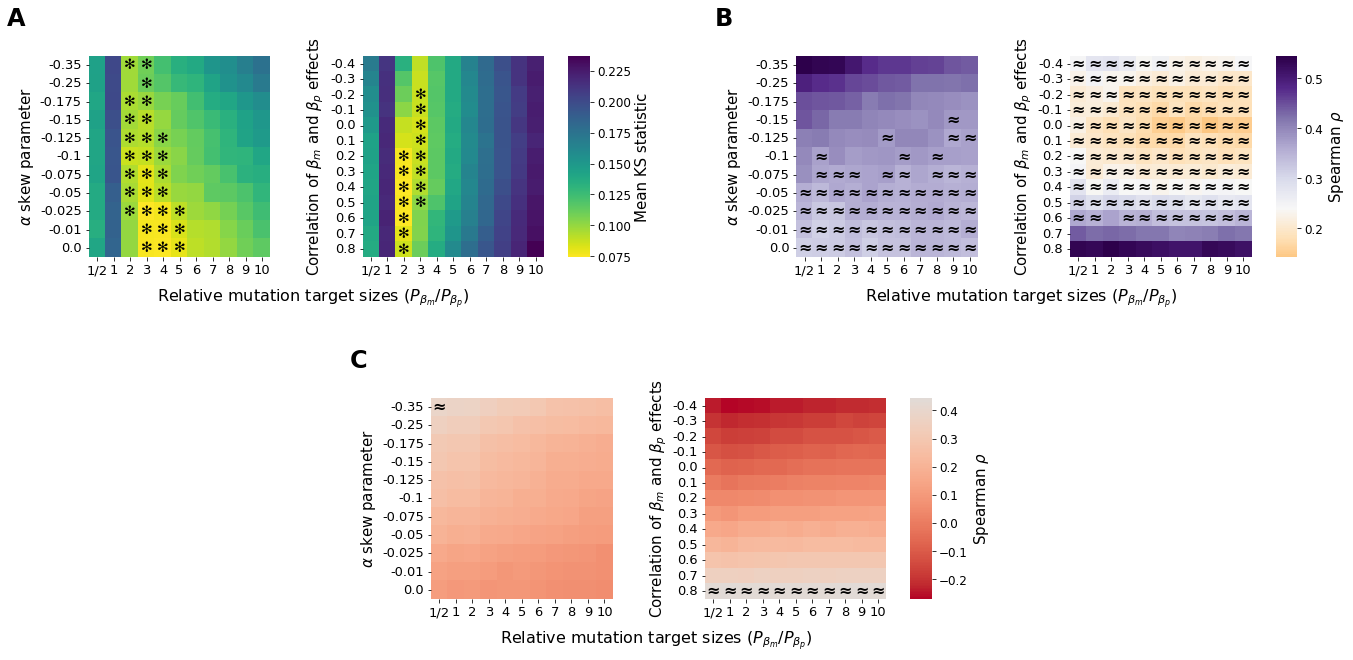

In [25]:
fig = plt.figure(constrained_layout=False, figsize=(19, 10))

# Preparation of the grids
gs1 = fig.add_gridspec(nrows=8, ncols=54, left=0.05, right=0.95, bottom=0.525, 
                       top=0.90, wspace=0.05)
ax1 = fig.add_subplot(gs1[1:7, 1:9])
ax2 = fig.add_subplot(gs1[1:7, 13:21])
ax3 = fig.add_subplot(gs1[1:7, 22:23])

ax4 = fig.add_subplot(gs1[1:7, 32:40])
ax5 = fig.add_subplot(gs1[1:7, 44:52])
ax6 = fig.add_subplot(gs1[1:7, 53:54])

gs2 = fig.add_gridspec(nrows=8, ncols=54, left=0.05, right=0.95, bottom=0.05, 
                       top=0.425, wspace=0.05)

ax7 = fig.add_subplot(gs2[1:7, 16:24])
ax8 = fig.add_subplot(gs2[1:7, 28:36])
ax9 = fig.add_subplot(gs2[1:7, 37:38])

# Minimal and maximal values for each heatmap
min_KS = np.min(np.min([KS_mean_alpha_mat.values.min(), KS_mean_corr_mat.values.min()]))
max_KS = np.max(np.max([KS_mean_alpha_mat.values.max(), KS_mean_corr_mat.values.max()]))

min_corr = np.min(np.min([fold_mean_alpha_mat.values.min(), fold_mean_corr_mat.values.min()]))
max_corr = np.max(np.max([fold_mean_alpha_mat.values.max(), fold_mean_corr_mat.values.max()]))

min_sign = np.min(np.min([signed_mean_alpha_mat.values.min(), signed_mean_corr_mat.values.min()]))
max_sign = np.max(np.max([signed_mean_alpha_mat.values.max(), signed_mean_corr_mat.values.max()]))

# Parameter(s) for the heatmaps
annot_params_KS = {"fontsize":14, "fontweight":'bold', 'c':'black'}
annot_params_red = {"fontsize":14, "fontweight":'bold', 'c':'red'}

annot_params = {"fontsize":16, "fontweight":'bold', 'c':'black'}

# First two heatmaps
heat1 = sns.heatmap(KS_mean_alpha_mat, vmin=min_KS, vmax=max_KS, cmap='viridis_r',
                    ax=ax1, annot=Moods_any_alpha, fmt = '', 
                    annot_kws=annot_params_KS, cbar=False)

heat1_2 = sns.heatmap(KS_mean_alpha_mat, vmin=min_KS, vmax=max_KS, cmap='viridis_r',
                    ax=ax1, annot=annot_all_alpha, fmt = '', 
                    annot_kws=annot_params_red, cbar=False)

heat2 = sns.heatmap(KS_mean_corr_mat, vmin=min_KS, vmax=max_KS, cmap='viridis_r',
                    ax=ax2, annot=Moods_any_corr, fmt = '', 
                    annot_kws=annot_params_KS, cbar_ax=ax3)

heat2_2 = sns.heatmap(KS_mean_corr_mat, vmin=min_KS, vmax=max_KS, cmap='viridis_r',
                    ax=ax2, annot=annot_all_corr, fmt = '', 
                    annot_kws=annot_params_red, cbar=False)

cbar = ax2.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Mean KS statistic', fontsize=15)

# Heatmaps of divergence correlations (magnitude)
heat3 = sns.heatmap(fold_mean_alpha_mat, vmin=min_corr, vmax=max_corr, cmap='PuOr', 
                    center=center_div, ax=ax4, annot=fold_equal_alpha, fmt = '', 
                    annot_kws=annot_params, cbar=False)

heat4 = sns.heatmap(fold_mean_corr_mat, vmin=min_corr, vmax=max_corr, cmap='PuOr', 
                    center=center_div, ax=ax5, annot=fold_equal_corr, fmt = '', 
                    annot_kws=annot_params, cbar_ax=ax6)

cbar = ax5.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)
cbar.set_label(r"Spearman $\rho$", fontsize=15)

# Heatmaps of signed divergence correlations
heat5 = sns.heatmap(signed_mean_alpha_mat, vmin=min_sign, vmax=max_sign, 
                    cmap='coolwarm_r', center=center_sign, ax=ax7, 
                    annot=signed_equal_alpha, fmt = '', annot_kws=annot_params,
                    cbar=False)

heat6 = sns.heatmap(signed_mean_corr_mat, vmin=min_sign, vmax=max_sign, 
                    cmap='coolwarm_r', center=center_sign, ax=ax8, 
                    annot=signed_equal_corr, fmt = '', annot_kws=annot_params,
                    cbar_ax=ax9)

cbar = ax8.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)
cbar.set_label(r"Spearman $\rho$", fontsize=15)

# Axes labels and annotations
# Manual addition of xlabels
ax1.annotate(r"Relative mutation target sizes ($P_{\beta_m}$/$P_{\beta_p}$)",
             (0.378, -0.225), xycoords='axes fraction', fontsize=16)
ax4.annotate(r"Relative mutation target sizes ($P_{\beta_m}$/$P_{\beta_p}$)",
             (0.378, -0.225), xycoords='axes fraction', fontsize=16)
ax7.annotate(r"Relative mutation target sizes ($P_{\beta_m}$/$P_{\beta_p}$)",
             (0.378, -0.225), xycoords='axes fraction', fontsize=16)

# Addition of ylabels
for ax in [ax1, ax4, ax7]:
  ax.set_ylabel(r"$\alpha$ skew parameter", fontsize=15)

for ax in [ax2, ax5, ax8]:
  ax.set_ylabel(r"Correlation of $\beta_m$ and $\beta_p$ effects", fontsize=15)

# Size of all ticks
for ax in [ax1, ax2, ax4, ax5, ax7, ax8]:
  ax.tick_params(axis='both', which='major', labelsize=13)

#Annotations of figures
ax1.annotate('A', (-0.45, 1.15), xycoords='axes fraction', fontsize=24, 
             fontweight='bold')
ax4.annotate('B', (-0.45, 1.15), xycoords='axes fraction', fontsize=24, 
             fontweight='bold')
ax7.annotate('C', (-0.45, 1.15), xycoords='axes fraction', fontsize=24, 
             fontweight='bold')
# Saving the figure
FigS11 = plt.gcf()
#FigS11.savefig('/content/drive/My Drive/Redaction_SA/Final_figures_v2/'
               #'FigS11.pdf', bbox_inches='tight')
FigS11.savefig('/content/drive/My Drive/Redaction_SA/Final_figures_v2/'
               'FigS11.tiff', bbox_inches='tight')